In [1]:
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from utils import helpers
from dotenv import load_dotenv
from utils.prepare_modis import download_data

In [15]:
load_dotenv()  

def getenv(key: str) -> str :
    value = os.getenv(key)
    if value is None:
        # Handle the case where the environment variable is not set
        raise ValueError(f"Environment variable '{key}' is not set.")
    return value

# Example usage:
username = getenv("USERNAME")
password = getenv("PASSWORD")

In [16]:
# Open the file in read mode
with open("urls.txt", "r") as f:
    # Read all lines into a list
    urls = f.readlines()

urls = [url.strip() for url in urls]

In [17]:
urls

['https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231203_20231210.L3m.8D.POC.poc.4km.NRT.nc',
 'https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231211_20231218.L3m.8D.POC.poc.4km.NRT.nc',
 'https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231219_20231226.L3m.8D.POC.poc.4km.NRT.nc',
 'https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231227_20231231.L3m.8D.POC.poc.4km.NRT.nc']

In [18]:
download_data(urls, "tmp_dir", username, password)

INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231203_20231210.L3m.8D.POC.poc.4km.NRT.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231203_20231210.L3m.8D.POC.poc.4km.NRT.nc to tmp_dir/AQUA_MODIS.20231203_20231210.L3m.8D.POC.poc.4km.NRT.nc
INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231211_20231218.L3m.8D.POC.poc.4km.NRT.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231211_20231218.L3m.8D.POC.poc.4km.NRT.nc to tmp_dir/AQUA_MODIS.20231211_20231218.L3m.8D.POC.poc.4km.NRT.nc
INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231219_20231226.L3m.8D.POC.poc.4km.NRT.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231219_20231226.L3m.8D.POC.poc.4km.NRT.nc to tmp_dir/AQUA_MODIS.20231219_20231226.L3m.8D.POC.poc.4km.NRT.nc
I

In [19]:
file_path = "tmp_dir/"
files = glob.glob(file_path + "*.nc")

In [7]:
# Open the netCDF file 
data = nc.Dataset(files[0], "r")

In [20]:
count, paths = helpers.count_empty_netcdf_files(files)

Error processing tmp_dir/AQUA_MODIS.20031001_20031031.L3b.MO.POC.nc: [Errno -101] NetCDF: HDF error: 'tmp_dir/AQUA_MODIS.20031001_20031031.L3b.MO.POC.nc'


In [21]:
paths

['tmp_dir/AQUA_MODIS.20231227_20231231.L3m.8D.POC.poc.4km.NRT.nc',
 'tmp_dir/AQUA_MODIS.20230101.L3m.DAY.POC.poc.4km.nc',
 'tmp_dir/AQUA_MODIS.20231211_20231218.L3m.8D.POC.poc.4km.NRT.nc',
 'tmp_dir/AQUA_MODIS.20230101.L3m.DAY.POC.poc.4km.NRT.nc',
 'tmp_dir/AQUA_MODIS.20231203_20231210.L3m.8D.POC.poc.4km.NRT.nc',
 'tmp_dir/AQUA_MODIS.20231219_20231226.L3m.8D.POC.poc.4km.NRT.nc']

In [9]:
data = nc.Dataset(paths[0], "r")
data.date_created[:10]

'2023-03-01'

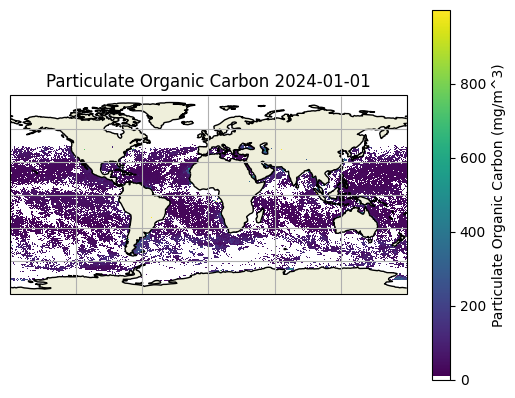

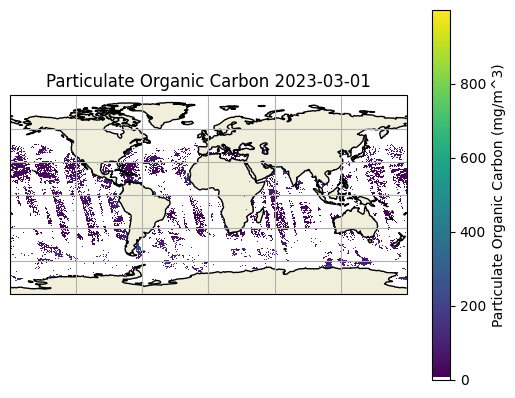

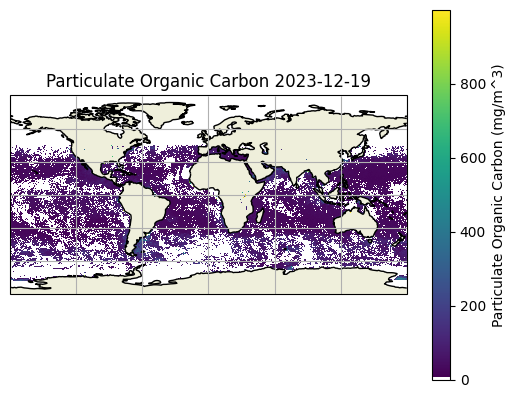

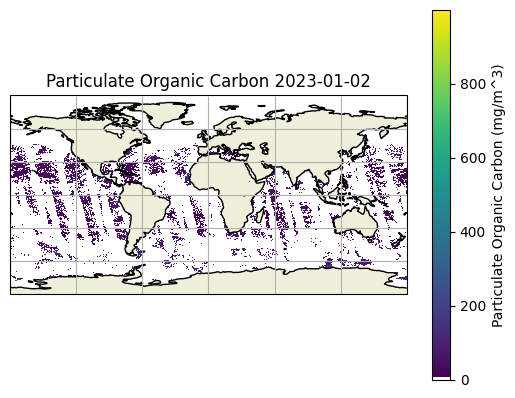

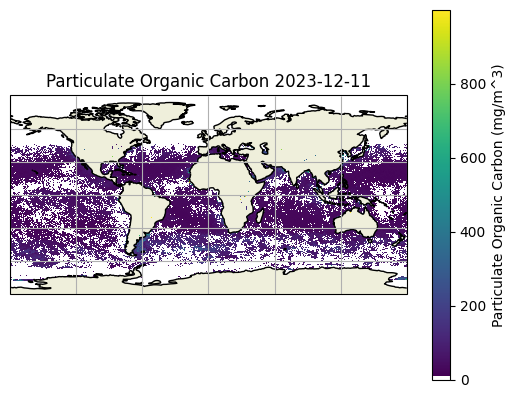

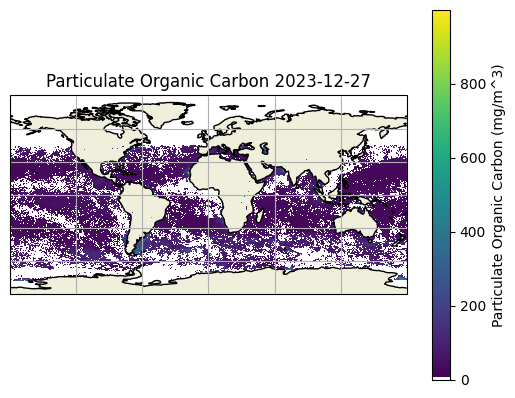

In [22]:
helpers.plot_poc_data(paths)

In [24]:
ds = nc.Dataset("tmp_dir/AQUA_MODIS.20230102.L3b.DAY.POC.nc")
ds.variables

{}

In [25]:
# Extract poc data as a numpy array
poc = ds['poc'][:]

# Create a GeoAxes with plate carree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land, coastlines and gridlines
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines() 

# Plot the poc data as a pcolormesh
plt.pcolormesh(ds['lon'][:], ds['lat'][:], poc, 
               transform=ccrs.PlateCarree())

plt.title('Particulate Organic Carbon 1/1/2023')
# Add axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Particulate Organic Carbon (mg/m^3)')

# Set colorbar tick locations and labels
cbar.set_ticks([0, 200, 400, 600, 800])  
cbar.set_ticklabels(["0", "200", "400", "600", "800"])

IndexError: poc not found in /

In [26]:
plt.hist(poc.flatten(), bins=100) 
plt.xlabel('POC (mg/m^3)')
plt.ylabel('Frequency')
plt.title('Histogram of POC Values')

NameError: name 'poc' is not defined

In [27]:
poc_data = ds['poc'][:]
plt.hist(poc_data.compressed(), bins=100)  # .compressed() removes masked data
plt.title('Histogram of POC Data')
plt.xlabel('POC')
plt.ylabel('Frequency')
plt.show()

IndexError: poc not found in /

In [28]:
mean_poc = np.mean(poc_data.compressed())
median_poc = np.median(poc_data.compressed())
std_poc = np.std(poc_data.compressed())
print(f"mean_poc: {mean_poc}, median_poc: {median_poc}, std_poc: {std_poc}")

NameError: name 'poc_data' is not defined

NameError: name 'cartopy' is not defined

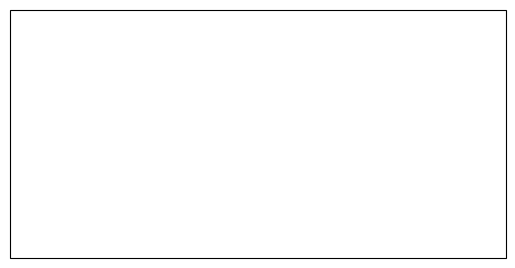

In [29]:
import cartopy.crs as ccrs

# Create a GeoAxes with the PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land, coastlines and gridlines
ax.add_feature(cartopy.feature.LAND)
ax.coastlines()
ax.gridlines()

# Plot the poc data as a pcolormesh
plt.pcolormesh(ds['lon'][:], ds['lat'][:], poc_data, 
               transform=ccrs.PlateCarree())

plt.title('Particulate Organic Carbon 1/1/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Particulate Organic Carbon (mg/m^3)')

# Set colorbar tick locations and labels
cbar.set_ticks([0, 200, 400, 600, 800])  
cbar.set_ticklabels(["0", "200", "400", "600", "800"])

plt.show()